In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/state-wise-power-consumption-in-india/dataset_tk.csv
/kaggle/input/state-wise-power-consumption-in-india/long_data_.csv


In [2]:
df_l=pd.read_csv("/kaggle/input/state-wise-power-consumption-in-india/long_data_.csv")
df_l.columns, df_l.shape

(Index(['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage'], dtype='object'),
 (16599, 6))

In [3]:
df_l.sample(7)

,States,Regions,latitude,longitude,Dates,Usage
2307,Mizoram,NER,23.710399,92.720015,14/03/2019 00:00:00,1.7
8260,Gujarat,WR,22.258700,71.192400,11/09/2019 00:00:00,357.9
4655,Rajasthan,NR,26.449999,74.639981,27/05/2019 00:00:00,171.9
15924,Kerala,SR,8.900373,76.569993,05/08/2020 00:00:00,78.9
6685,Tamil Nadu,SR,12.920386,79.150042,23/07/2019 00:00:00,328.1
16089,Kerala,SR,8.900373,76.569993,05/09/2020 00:00:00,79.5
8785,J&K,NR,33.450000,76.240000,27/09/2019 00:00:00,40.3


In [4]:
# Cheking missing values
df_l.isnull().sum()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

no missing values

In [5]:
# checking duplicate values
df_l.duplicated().sum()

12

In [6]:
# removing duplicate values 
df_final = df_l.drop_duplicates()
df_final

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9
...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,05/12/2020 00:00:00,2.5
16595,Meghalaya,NER,25.570492,91.880014,05/12/2020 00:00:00,5.8
16596,Mizoram,NER,23.710399,92.720015,05/12/2020 00:00:00,1.6
16597,Nagaland,NER,25.666998,94.116570,05/12/2020 00:00:00,2.1


### Univariate Analysis

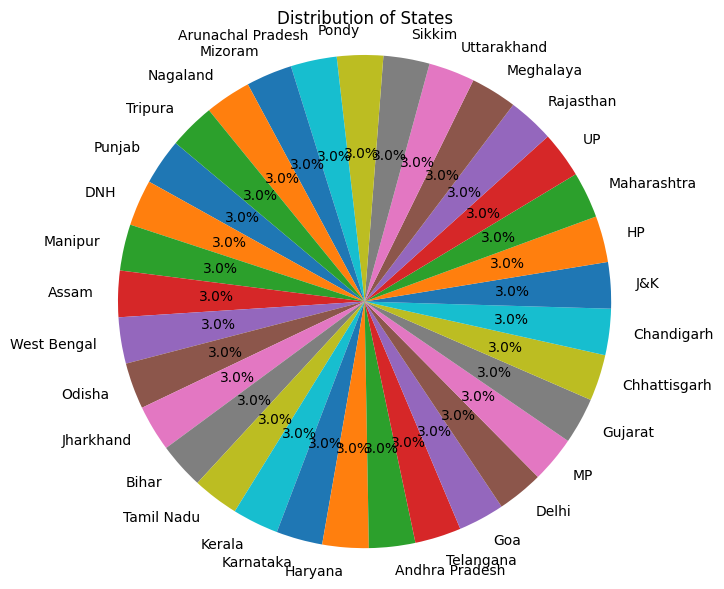

In [7]:
# States

import matplotlib.pyplot as plt
state_counts = df_final["States"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()

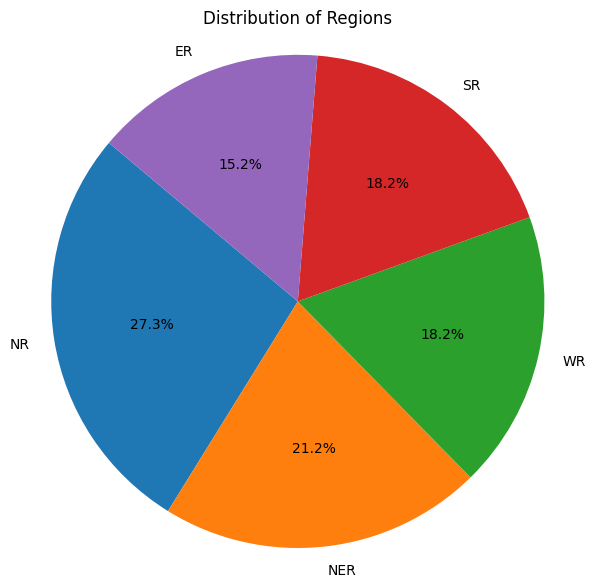

In [8]:
# Regions

region_counts = df_final["Regions"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Regions')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()

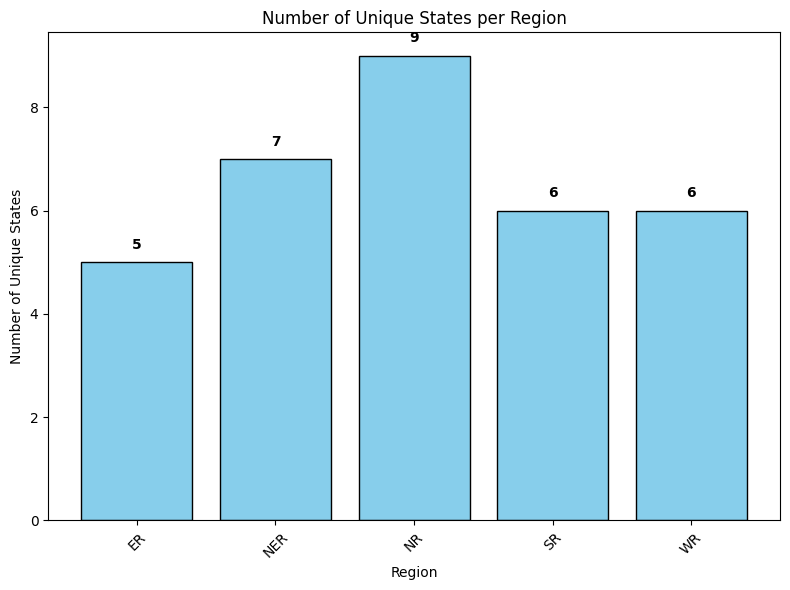

In [9]:
# Group and count unique states per region

state_region_counts = df_final.groupby("Regions")["States"].nunique()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(state_region_counts.index, state_region_counts.values, color='skyblue', edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Number of Unique States per Region')
plt.xlabel('Region')
plt.ylabel('Number of Unique States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Usage Column

df_final['Usage'].describe()

count    16587.000000
mean       103.072539
std        116.056017
min          0.300000
25%          6.700000
50%         64.600000
75%        174.000000
max        522.100000
Name: Usage, dtype: float64

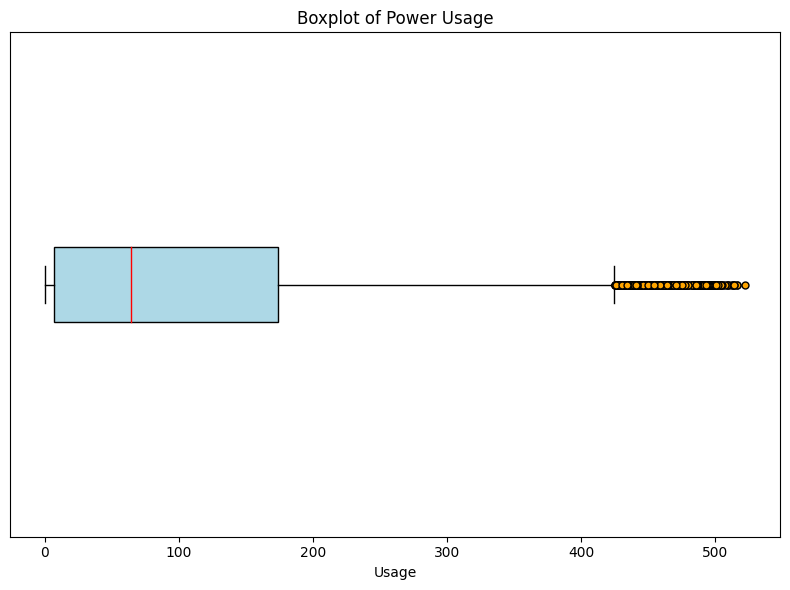

In [11]:
import matplotlib.pyplot as plt

# Describe statistics
usage_stats = df_final['Usage'].describe()

# Plotting boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(df_final['Usage'], vert=False, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='black'),
                  medianprops=dict(color='red'),
                  whiskerprops=dict(color='black'),
                  capprops=dict(color='black'),
                  flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))

# Title and labels
plt.title('Boxplot of Power Usage')
plt.xlabel('Usage')
plt.yticks([])  # Hide y-axis ticks
plt.tight_layout()
plt.show()


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Dates column

df_final['Dates'] = pd.to_datetime(df_final['Dates'], format="%d/%m/%Y %H:%M:%S")

# Get min and max dates
start_date = df_final['Dates'].min()
end_date = df_final['Dates'].max()

# Calculate duration
duration = end_date - start_date

# Display
print(f"Data starts from: {start_date}")
print(f"Data ends on:     {end_date}")
print(f"Total duration:   {duration}")


Data starts from: 2019-01-02 00:00:00
Data ends on:     2020-12-05 00:00:00
Total duration:   703 days 00:00:00


### Bivariate Analysis

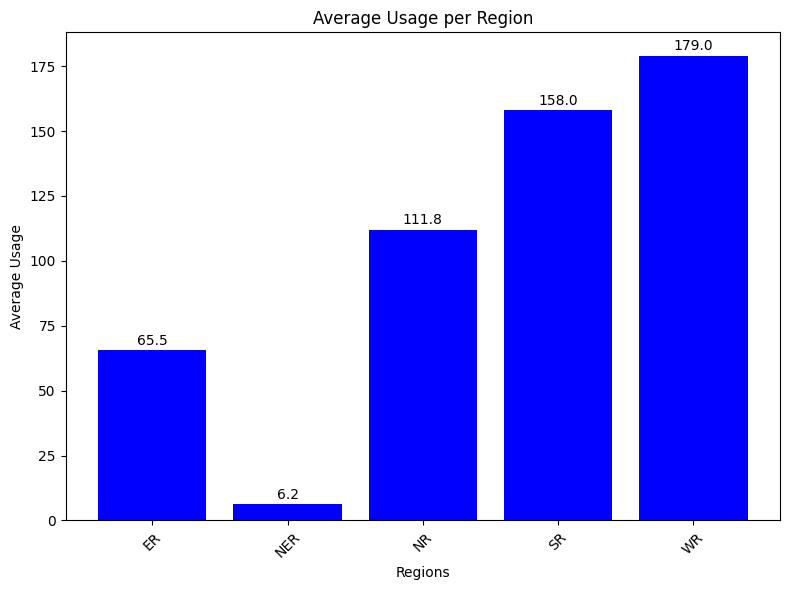

In [14]:
# Regions and Usage

import matplotlib.pyplot as plt

# Calculate mean Usage per Region
region_usage_mean = df_final.groupby('Regions')['Usage'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(region_usage_mean.index, region_usage_mean.values, color='blue')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom')

# Labeling
plt.xlabel('Regions')
plt.ylabel('Average Usage')
plt.title('Average Usage per Region')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



In [15]:
# Mean Usage per state

mean_usage_per_state = df_final.groupby('States')['Usage'].mean().sort_values(ascending=False)
mean_usage_per_state

States
Maharashtra          431.570179
Gujarat              323.039563
UP                   314.036382
Tamil Nadu           300.738569
Rajasthan            218.443340
MP                   208.283101
Karnataka            204.106759
Telangana            187.008549
Andhra Pradesh       176.151889
Punjab               141.145527
West Bengal          138.708151
Haryana              138.333598
Chhattisgarh          83.877137
Delhi                 83.380716
Bihar                 83.159443
Odisha                80.464612
Kerala                72.192445
J&K                   44.264016
Uttarakhand           36.161155
HP                    26.568191
Assam                 24.960040
Jharkhand             23.842545
DNH                   16.430616
Goa                   11.093241
Pondy                  7.473108
Meghalaya              5.646813
Chandigarh             4.141551
Tripura                4.089022
Manipur                2.494632
Nagaland               2.163273
Arunachal Pradesh      2.110579
M

In [16]:
import plotly.express as px
df_mean_usage = df_final.groupby('States').agg({'Usage': 'mean', 'latitude': 'mean', 'longitude': 'mean'}).reset_index()
fig = px.scatter_geo(df_mean_usage,
                     lat='latitude', 
                     lon='longitude', 
                     color='Usage', 
                     hover_name='States')  # You can choose any color scale
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100])
fig.show()

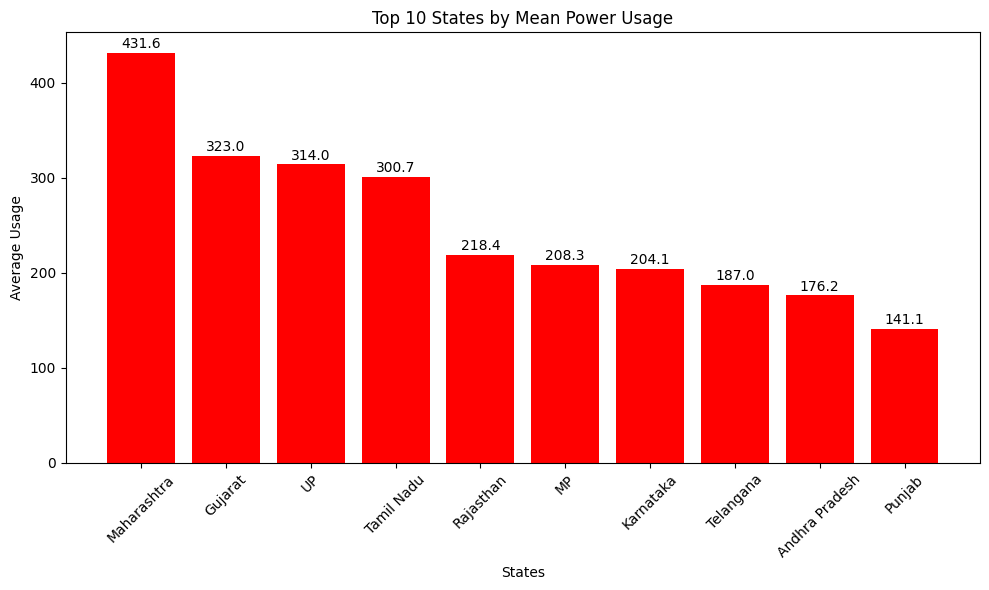

In [17]:
# Top 10 states with maximum usage

top10_states = mean_usage_per_state.head(10)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(top10_states.index, top10_states.values, color='red')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}', ha='center', va='bottom')

# Labeling
plt.xlabel('States')
plt.ylabel('Average Usage')
plt.title('Top 10 States by Mean Power Usage')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



<Axes: xlabel='Dates'>

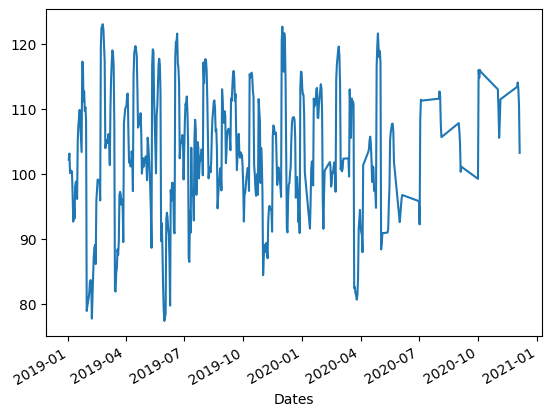

In [18]:
# Usage w.r.t date

df_final.groupby('Dates')['Usage'].mean().plot()


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Usage w.r.t month

import pandas as pd
import plotly.express as px

# Convert 'Dates' column to datetime
df_final['Dates'] = pd.to_datetime(df_final['Dates'])

# Extract Year-Month
df_final['Year-Month'] = df_final['Dates'].dt.to_period('M').astype(str)

# Group by 'Year-Month' and calculate mean usage
monthly_usage = df_final.groupby('Year-Month')['Usage'].mean().reset_index()

# Plot interactive line chart
fig = px.line(monthly_usage, x='Year-Month', y='Usage', 
              title='Mean Usage per Month',
              labels={'Usage': 'Mean Usage', 'Year-Month': 'Month'},
              markers=True)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Mean Usage',
    xaxis_tickangle=-45
)

fig.show()


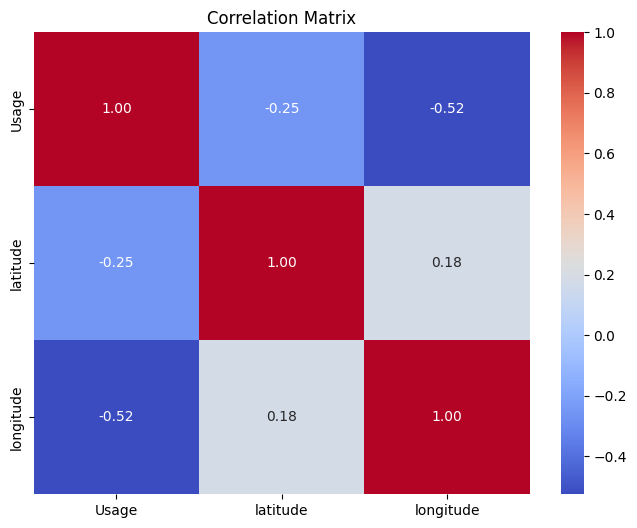

In [21]:
# Usage w.r.t longitude and latitude 
import seaborn as sns
numeric_cols = ['Usage', 'latitude', 'longitude']
plt.figure(figsize=(8, 6))
corr_matrix = df_final[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [22]:
# Outlier values w.r.t states

# Using IQR method again
Q1 = df_final['Usage'].quantile(0.25)
Q3 = df_final['Usage'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_final[(df_final['Usage'] < lower) | (df_final['Usage'] > upper)]
print(outliers[['States', 'Usage']].sort_values('Usage', ascending=False))
outlier_states = outliers['States'].unique()
print(outlier_states)



            States  Usage
5424   Maharashtra  522.1
1662   Maharashtra  516.4
1695   Maharashtra  515.8
5391   Maharashtra  513.9
5358   Maharashtra  513.6
...            ...    ...
15679           UP  425.6
3873   Maharashtra  425.5
13575  Maharashtra  425.1
7066            UP  425.1
6744   Maharashtra  425.1

[314 rows x 2 columns]
['Maharashtra' 'UP']


In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('/kaggle/input/state-wise-power-consumption-in-india/long_data_.csv')

# Convert 'Dates' to datetime format
df_final['Dates'] = pd.to_datetime(df_final['Dates'], format="%d/%m/%Y %H:%M:%S")

# Extract 'Month' in YYYY-MM format
df_final['Month'] = df_final['Dates'].dt.to_period('M').astype(str)

# Group by 'States' and 'Month' and calculate mean 'Usage'
state_month_usage = df_final.groupby(['States', 'Month'])['Usage'].mean().reset_index()

# Sort values for readability
state_month_usage = state_month_usage.sort_values(by=['States', 'Month'])

# Display summary statistics of the monthly average Usage
usage_stats = state_month_usage['Usage'].describe()
print("Monthly Usage Statistics (Grouped by State and Month):\n")
print(usage_stats)

Monthly Usage Statistics (Grouped by State and Month):

count    792.000000
mean     103.845091
std      115.037608
min        1.031818
25%        7.216190
50%       70.458333
75%      176.917403
max      488.940000
Name: Usage, dtype: float64


In [25]:
!pip install bar_chart_race --q


In [26]:
# monthly usage per state
import pandas as pd
import bar_chart_race as bcr

state_month_usage['Month'] = pd.to_datetime(state_month_usage['Month'])

df_race = state_month_usage.pivot(index='Month', columns='States', values='Usage')

df_race = df_race.sort_index()

# Run bar chart race
bcr.bar_chart_race(
    df=df_race,
    filename=None,  
    orientation='h',
    sort='desc',
    n_bars=33,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=40,
    interpolate_period=True,
    label_bars=True,
    period_length=2000,
    period_fmt='%b %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .2,
                                      's': f'Total Usage: {int(v.sum())}',
                                      'ha': 'right', 'size': 8},
    perpendicular_bar_func=None,
    figsize=(5, 4),
    dpi=144,
    cmap='dark24',
    title='Monthly Power Usage(Mean) by Indian States',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family': 'Courier New', 'color': '.1'},
    scale='linear',
    bar_kwargs={'alpha': .7},
    filter_column_colors=True
)

In [27]:
import pandas as pd
import plotly.graph_objects as go

# Ensure 'Dates' is in datetime format
df_final['Dates'] = pd.to_datetime(df_final['Dates'], format="%d/%m/%Y %H:%M:%S")

# Create figure
fig = go.Figure()
states = df_final['States'].unique()

# Add traces (initially hidden but visible in legend)
for state in states:
    state_data = df_final[df_final['States'] == state]
    fig.add_trace(go.Scatter(
        x=state_data['Dates'],
        y=state_data['Usage'],
        mode='lines',
        name=state,
        visible='legendonly'
    ))

# Create visibility lists
all_visible = [True] * len(states)
all_legendonly = ['legendonly'] * len(states)

# Add buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=[
                dict(label="Select All",
                     method="update",
                     args=[{"visible": all_visible}]),
                dict(label="Deselect All",
                     method="update",
                     args=[{"visible": all_legendonly}])
            ],
            pad={"r": 10, "t": 10},
            showactive=False,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top"
        )
    ],
    title='Power Usage Over Time by State',
    xaxis_title='Date',
    yaxis_title='Power Usage',
    legend_title='State',
    hovermode='x unified'
)

fig.show()


In [28]:
# Define cutoff date
cutoff_date = pd.Timestamp('2020-01-01')

# Count entries before and after the cutoff date
before_count = df_final[df_final['Dates'] < cutoff_date].shape[0]
after_count = df_final[df_final['Dates'] >= cutoff_date].shape[0]

print(f"Entries before 1 Jan 2020: {before_count}")
print(f"Entries on or after 1 Jan 2020: {after_count}")


Entries before 1 Jan 2020: 11835
Entries on or after 1 Jan 2020: 4752


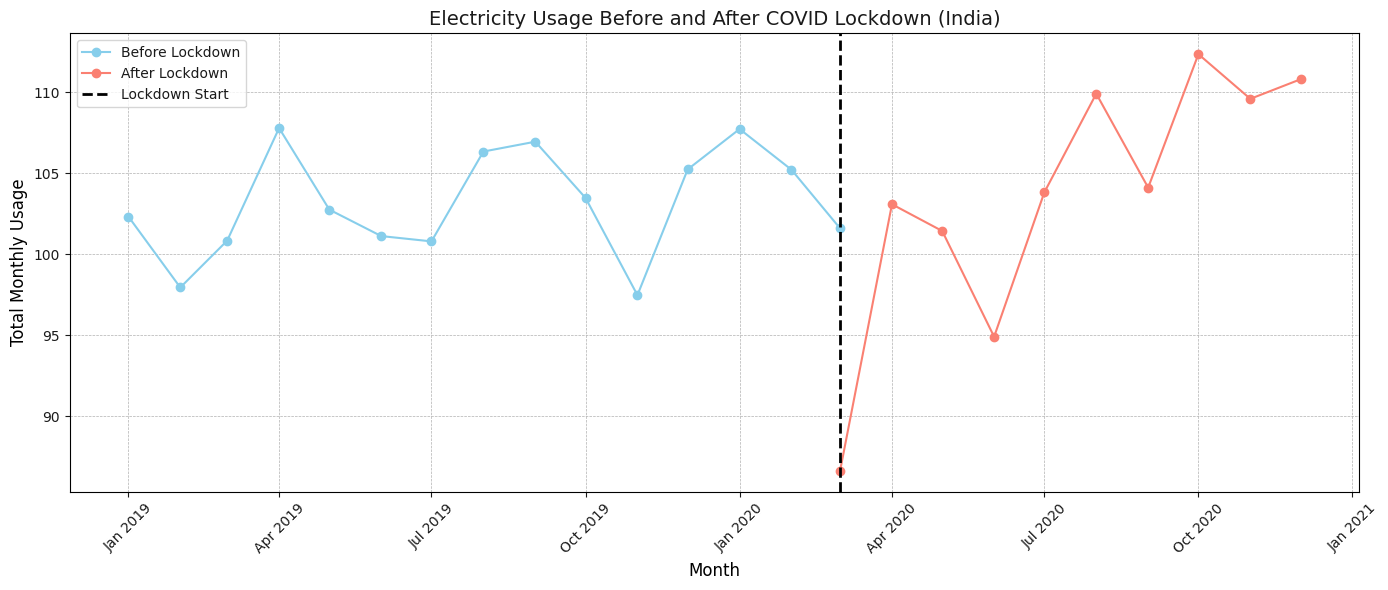

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

# Convert 'year month' column to datetime (assuming format 'YYYY-MM')
df_final['Year-Month'] = pd.to_datetime(df_final['Year-Month'], format='%Y-%m')

# Define lockdown date
lockdown_date = pd.Timestamp('2020-03-25')

# Split data before and after lockdown
before_lockdown = df_final[df_final['Dates'] < lockdown_date]
after_lockdown = df_final[df_final['Dates'] >= lockdown_date]

# Group by 'year month' and calculate total usage
before_agg = before_lockdown.groupby('Year-Month')['Usage'].mean()
after_agg = after_lockdown.groupby('Year-Month')['Usage'].mean()

# Plotting
plt.figure(figsize=(14, 6))
line1, = plt.plot(before_agg.index, before_agg.values, label='Before Lockdown', color='skyblue', marker='o')
line2, = plt.plot(after_agg.index, after_agg.values, label='After Lockdown', color='salmon', marker='o')

# Mark lockdown date
plt.axvline(pd.Timestamp('2020-03'), color='black', linestyle='--', linewidth=2, label='Lockdown Start')

# Format x-axis to show month names
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Labels and styling
plt.title("Electricity Usage Before and After COVID Lockdown (India)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Monthly Usage", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Make the plot interactive for data points
mplcursors.cursor([line1, line2], hover=True).connect("add", lambda sel: sel.annotation.set_text(f"{sel.target[0]:.2f}, {sel.target[1]:.2f}"))

# Show plot
plt.show()


In [33]:
import plotly.graph_objects as go

states = state_month_usage['States'].unique()

# Create the figure
fig = go.Figure()

# Add a bar trace for each state (only first state is visible initially)
for i, state in enumerate(states):
    state_data = state_month_usage[state_month_usage['States'] == state]
    fig.add_trace(go.Bar(
        x=state_data['Month'],
        y=state_data['Usage'],
        name=state,
        visible=(i == 0)  # Only show the first state initially
    ))

# Add dropdown to toggle visibility
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": state,
                    "method": "update",
                    "args": [
                        {"visible": [i == j for j in range(len(states))]},
                        {"title": f"Monthly Usage for {state}"}
                    ],
                } for i, state in enumerate(states)
            ],
            "direction": "down",
            "showactive": True,
            "x": 1.1,
            "xanchor": "left",
            "y": 1.15,
            "yanchor": "top"
        }
    ],
    title=f"Monthly Usage for {states[0]}",
    xaxis_title="Months",
    yaxis_title="Average Usage in Mega Units(MU)",
    height=500
)

fig.show()